# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2024-05-27 02:05:01 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [ ]:
# Install necessary packages
using Pkg
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed JpegTurbo_jll ──────────────── v3.0.3+0
   Installed GR_jll ─────────────────────── v0.73.5+0
   Installed Libmount_jll ───────────────── v2.40.1+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Unitful ────────────────────── v1.20.0
   Installed Contour ────────────────────── v0.6.3
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed ConcurrentUtilities ────────── v2.4.1
   Installed Plot

In [ ]:
# Julia code for the heat equation solver

using Plots

# Parameters
length = 60.0  # Length of the rod in meters
dx = 0.1  # Spatial step in meters
x = 0:dx:length

time_total = 100*365*24*360.0  # Total time to simulate in seconds
dt = 5000 # dt = dx^2 / (2 * alpha)  # Time step ensuring stability
t = 0:dt:time_total

alpha = 7.0e-7  # Thermal diffusivity in m^2/s

# Derived parameters
nt = size(t)[1]  # Number of time steps
nx = size(x)[1]  # Number of spatial points

factor = alpha*dt/(dx*dx)

0.3499999999999999

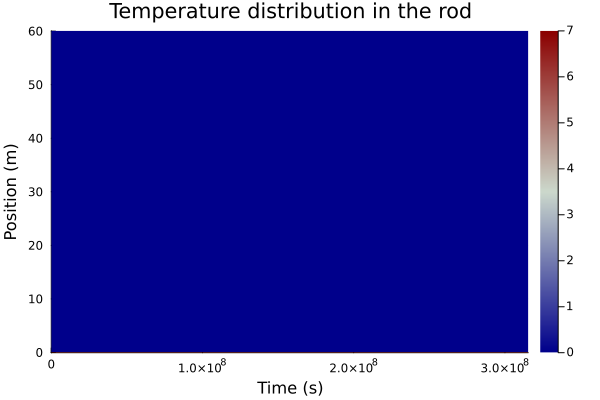

In [ ]:
# Initialize temperature array
u = zeros(Float64, (nx,nt))
u[1, :] .= 100.0  # Boundary condition at y=0

# Plotting the results
heatmap(t, x, u, xlabel="Time (s)", ylabel="Position (m)", title="Temperature distribution in the rod", color=:bluesreds)

In [ ]:
u

601×63073 Matrix{Float64}:
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  …  7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [ ]:
for i in 2:nt
  for j in 2:nx-1
    u[j,i] = u[j,i-1] + factor * (u[j-1,i-1] - 2*u[j,i-1] + u[j+1,i-1])
  end
end

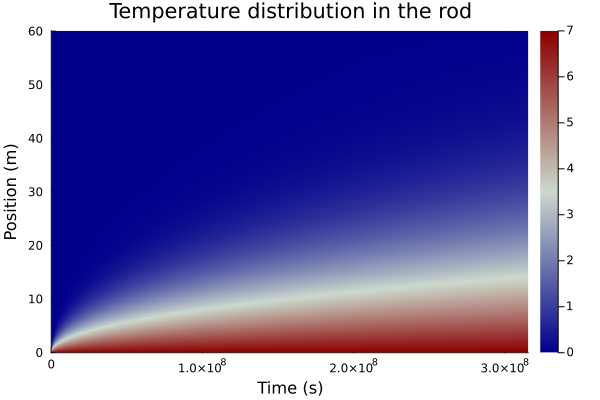

In [ ]:
heatmap(t, x, u, xlabel="Time (s)", ylabel="Position (m)", title="Temperature distribution in the rod", color=:bluesreds)

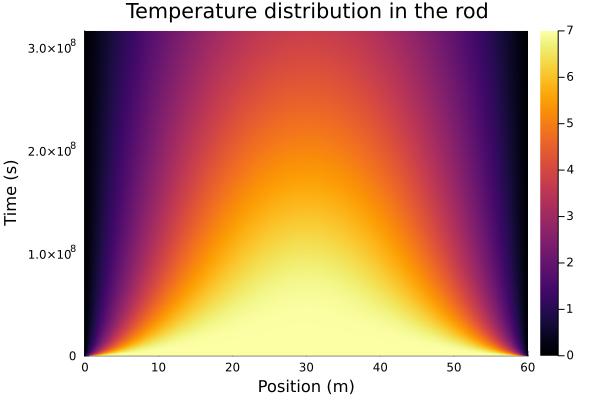

In [ ]:
# Plotting the results

heatmap(x, t, u, xlabel="Position (m)", ylabel="Time (s)", title="Temperature distribution in the rod", color=:inferno)


In [ ]:
using Plots

# Parameters
length = 60.0  # Length of the rod in meters
time_total = 100*365*24*360.0  # Total time to simulate in seconds
dx = 0.1  # Spatial step in meters
alpha = 1.0e-6  # Thermal diffusivity in m^2/s

# Derived parameters
dt = dx^2 / (2 * alpha)  # Time step ensuring stability
nt = Int(ceil(time_total / dt))  # Number of time steps
nx = Int(ceil(length / dx)) + 1  # Number of spatial points

# Pre-compute constants for efficiency
factor = alpha * dt / (dx^2)
inv_factor = 1.0 - 2.0 * factor

# Initialize temperature array
u = zeros(Float64, (nt, nx))
u[:, 1] .= 7.0  # Boundary condition at y=0

# Vectorized loop for faster computation
for i in 2:nt
  u[i, 2:nx-1] = inv_factor * u[i-1, 2:nx-1] + factor * (u[i-1, 3:nx] + u[i-1, 1:nx-2])
end

# Plotting the results
x = 0:dx:length
t = 0:dt:time_total
heatmap(x, t, u, xlabel="Position (m)", ylabel="Time (s)", title="Temperature distribution in the rod", color=:inferno)


In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  465.359 ms (2 allocations: 32.00 MiB)


In [ ]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />